# Yoga Pose Classification

<h2> In this project, I have used CNN model to classify images into different YOGA poses.

In [ ]:
# installing kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copying kappgle API
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: the following arguments are required: command


In [ ]:
#checking for the datasets
!kaggle datasets list -s Yoga-Pose-Classification

ref                                                  title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------  ------  -------------------  -------------  ---------  ---------------  
ujjwalchowdhury/yoga-pose-classification             Yoga Pose Classification                  15MB  2022-06-05 14:46:16            417         47  0.875            
shrutisaxena/yoga-pose-image-classification-dataset  Yoga Pose Image classification dataset  1004MB  2021-04-03 14:37:48           2672         92  0.875            
elysian01/yoga-pose-classification                   Yoga Pose Classification                 528MB  2021-04-10 21:47:18            301          9  0.6875           
utkarshsaxenadn/yoga-posture-classification          Yoga Posture Classification               79MB  2022-09-20 23:30:46            560         29  1.0              
laks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/My Drive"

/content/drive/My Drive


dataset: https://www.kaggle.com/datasets/shrutisaxena/yoga-pose-image-classification-dataset

In [ ]:
#downloading the dataset
!kaggle datasets download shrutisaxena/yoga-pose-image-classification-dataset

yoga-pose-image-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzipping the dataset
!unzip /content/drive/MyDrive/yoga-pose-image-classification-dataset.zip

Archive:  /content/drive/MyDrive/yoga-pose-image-classification-dataset.zip
replace dataset/adho mukha svanasana/1. 1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/adho mukha svanasana/1. 5-benefits-of-downward-facing-dog-pose.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace dataset/adho mukha svanasana/1. 5-benefits-of-downward-facing-dog-pose.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pylab as plt

from tqdm.notebook import tqdm
from glob import glob
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage import transform

import tensorflow as tf
from tensorflow import keras

import keras.backend as K
from keras.utils.np_utils import to_categorical

%matplotlib inline

In [ ]:
labels=[]  #to store all the labels
path='/content/drive/MyDrive/dataset/'
# os.listdir(path)
for i in os.listdir(path):
    labels.append(i)

labels

['adho mukha svanasana',
 'adho mukha vriksasana',
 'agnistambhasana',
 'ananda balasana',
 'anantasana',
 'anjaneyasana',
 'ardha bhekasana',
 'ardha chandrasana',
 'ardha matsyendrasana',
 'ardha pincha mayurasana',
 'ardha uttanasana',
 'ashtanga namaskara',
 'astavakrasana',
 'baddha konasana',
 'bakasana',
 'balasana',
 'bhairavasana',
 'bharadvajasana i',
 'bhekasana',
 'bhujangasana',
 'bhujapidasana',
 'bitilasana',
 'camatkarasana',
 'chakravakasana',
 'chaturanga dandasana',
 'dandasana',
 'dhanurasana',
 'durvasasana',
 'dwi pada viparita dandasana',
 'eka pada koundinyanasana i',
 'eka pada koundinyanasana ii',
 'eka pada rajakapotasana ii',
 'eka pada rajakapotasana',
 'ganda bherundasana',
 'garbha pindasana',
 'garudasana',
 'gomukhasana',
 'halasana',
 'hanumanasana',
 'janu sirsasana',
 'kapotasana',
 'krounchasana',
 'kurmasana',
 'lolasana',
 'makara adho mukha svanasana',
 'makarasana',
 'malasana',
 'marichyasana i',
 'marichyasana iii',
 'marjaryasana',
 'matsyasa

In [ ]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print('Length of',i,':',len(os.listdir(os.path.join(path,i))))
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print('Total Samples:',Total_sample)

Length of adho mukha svanasana : 69
Length of adho mukha vriksasana : 59
Length of agnistambhasana : 33
Length of ananda balasana : 59
Length of anantasana : 43
Length of anjaneyasana : 64
Length of ardha bhekasana : 40
Length of ardha chandrasana : 52
Length of ardha matsyendrasana : 90
Length of ardha pincha mayurasana : 47
Length of ardha uttanasana : 66
Length of ashtanga namaskara : 34
Length of astavakrasana : 72
Length of baddha konasana : 70
Length of bakasana : 77
Length of balasana : 71
Length of bhairavasana : 46
Length of bharadvajasana i : 54
Length of bhekasana : 39
Length of bhujangasana : 73
Length of bhujapidasana : 61
Length of bitilasana : 87
Length of camatkarasana : 54
Length of chakravakasana : 70
Length of chaturanga dandasana : 90
Length of dandasana : 60
Length of dhanurasana : 46
Length of durvasasana : 39
Length of dwi pada viparita dandasana : 55
Length of eka pada koundinyanasana i : 51
Length of eka pada koundinyanasana ii : 58
Length of eka pada rajakapot

<h3> Preprocessing Images

    1- Resizing
    2- Scaling

In [ ]:
img_size=128     # 128*128
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

In [ ]:
X[0] # Skimage scale image in range of 0 to 1

array([[[0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        ...,
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948]],

       [[0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        ...,
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948]],

       [[0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        ...,
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948]],

       ...,

       [[0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0.99411765, 0.16535948],
        [0.99607843, 0

<h3> Visualizing the Images

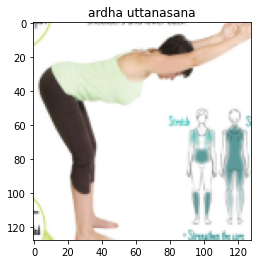

In [ ]:
plt.imshow(X[601]) #checking any random image
plt.title(labels[Y[601]])
plt.show()

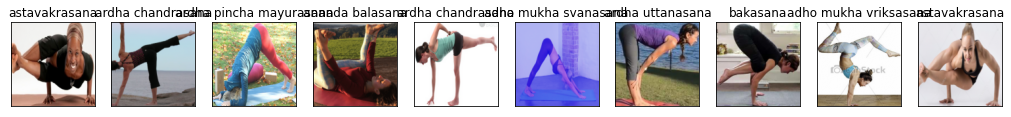

In [ ]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

<h3>Spliting the Data into the train & test

model building phase strted



In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,stratify=Y)

In [ ]:
print('Shapes of Data Split into Train & Test Part')
print('Training Data->',X_train.shape,Y_train.shape,'Testing Data->',X_test.shape,Y_test.shape)

Shapes of Data Split into Train & Test Part
Training Data-> (4495, 128, 128, 3) (4495,) Testing Data-> (1499, 128, 128, 3) (1499,)


In [ ]:
# OneHot-Encoding
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [ ]:
Y_train.shape,Y_test.shape

((4495, 107), (1499, 107))

<h3>Building the CNN Model

In [ ]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(128,(5,5),padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
history=model.fit(X_train, Y_train, validation_split=0.25, epochs=50, batch_size=32, verbose=1) #training the model

Epoch 1/50
106/106 [==============================] - 17s 81ms/step - loss: 4.6742 - accuracy: 0.0125 - val_loss: 4.6699 - val_accuracy: 0.0053
Epoch 2/50
106/106 [==============================] - 8s 72ms/step - loss: 4.6193 - accuracy: 0.0225 - val_loss: 4.5790 - val_accuracy: 0.0285
Epoch 3/50
106/106 [==============================] - 8s 72ms/step - loss: 4.5370 - accuracy: 0.0386 - val_loss: 5.0814 - val_accuracy: 0.0214
Epoch 4/50
106/106 [==============================] - 8s 78ms/step - loss: 4.4709 - accuracy: 0.0489 - val_loss: 4.5145 - val_accuracy: 0.0338
Epoch 5/50
106/106 [==============================] - 8s 72ms/step - loss: 4.3850 - accuracy: 0.0620 - val_loss: 4.4118 - val_accuracy: 0.0614
Epoch 6/50
106/106 [==============================] - 8s 72ms/step - loss: 4.0851 - accuracy: 0.1092 - val_loss: 4.1327 - val_accuracy: 0.0890
Epoch 7/50
106/106 [==============================] - 8s 74ms/step - loss: 3.5818 - accuracy: 0.1985 - val_loss: 3.8812 - val_accuracy: 0.145

Text(0.5, 1.0, 'Loss evolution')

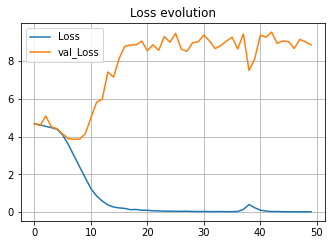

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

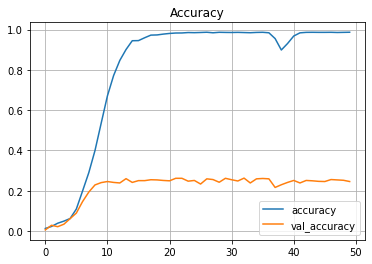

In [ ]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

<h3>Saving the Model

In [ ]:
model.save('./Yoga_CNN.h5')

<h3> Evaluating the Model

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=1)

47/47 [==============================] - 1s 30ms/step - loss: 8.8802 - accuracy: 0.2695


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

47/47 [==============================] - 1s 20ms/step


array([96, 98, 76, ..., 73, 23, 48])

In [ ]:
Y_test=np.argmax(Y_test,axis=1)
Y_test

array([59, 72, 50, ..., 73, 45, 48])

In [ ]:
#Printing Confusion Matrix

from sklearn import metrics
metrics.confusion_matrix(Y_test,y_pred)

array([[8, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 0, 3]])

In [ ]:
#Printing Classification Report

metrics.classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.44      0.47      0.46        17\n           1       0.14      0.13      0.14        15\n           2       0.00      0.00      0.00         8\n           3       0.27      0.40      0.32        15\n           4       0.10      0.09      0.10        11\n           5       0.30      0.50      0.37        16\n           6       0.21      0.30      0.25        10\n           7       0.27      0.31      0.29        13\n           8       0.29      0.17      0.22        23\n           9       0.25      0.25      0.25        12\n          10       0.35      0.41      0.38        17\n          11       0.00      0.00      0.00         8\n          12       0.27      0.33      0.30        18\n          13       0.33      0.33      0.33        18\n          14       0.36      0.42      0.39        19\n          15       0.40      0.33      0.36        18\n          16       0.43      0.27      0.33        11\n       

47/47 [==============================] - 1s 20ms/step


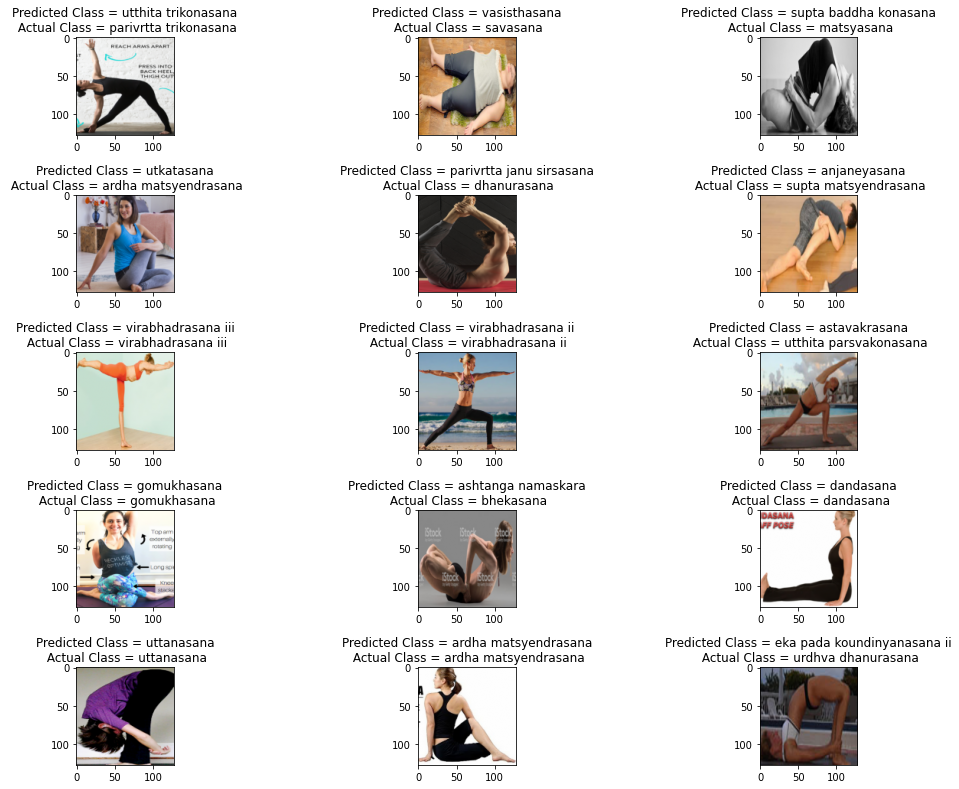

In [ ]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=2.5)